# データ分析（2）

《学修項目》
*   クラスター分析
*   次元削減
*   パターン発見（アソシエーション分析）

《キーワード》
> 階層的クラスター分析、非階層的クラスター分析、重心法、群平均法、ウォード法、樹形図（デンドログラム）、k-means法、主成分分析、行列の固有値分解、カーネル法、ガウスカーネル、相関ルール、バスケット分析、支持度、確信度、リフト値、Aprioriアルゴリズム


《参考文献，参考書籍》
*   [1] [東京大学MIセンター公開教材 「1-4 データ分析」](http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf)[《利用条件CC BY-NC-SA》](https://creativecommons.org/licenses/by-nc-sa/4.0/deed.ja)
*   [2] [応用基礎としてのデータサイエンス（講談社 データサイエンス入門シリーズ）](https://www.kspub.co.jp/book/detail/5307892.html)
*   [3] [データサイエンスの考え方 社会に役立つAI×データ活用のために（オーム社）](https://www.ohmsha.co.jp/book/9784274227974/)
*   [4] [Pythonによるあたらしいデータ分析の教科書 第2版（翔泳社）](https://www.shoeisha.co.jp/book/detail/9784798178776)
*   [5] [数理・データサイエンス・AI公開講座（放送大学）](https://www.ouj.ac.jp/booklet/2022/29_2022_MDS-AI.pdf)

## 1. クラスター分析

### 1.1 概要 [1][2]

企業は、市場の見込み客を特定することができれば効率的なマーケティング戦略が可能になる。
クライアントの属性情報や、利用履歴の情報を用いて、顧客を似た者どうしのグループに細分化し、
グループごとの注文・消費行動などの特徴を調べ、効果的な見込み客の特定を行うことがある。
このようなグループ化を**セグメンテーション**(segmentation) という。
セグメンテーションを行う際に用いられる分析手法が**クラスター分析**（cluster analysis) である[2]。

クラスター分析は、説明変数の情報を利用せず、データを似たもの同士に分類する（教師なし学習）。
どんなデータを似ていると考えるかは、２点間の距離やクラスター間の距離（類似度）の定義による。
距離の定義によって結果が異なることがあることに注意する。

代表的なクラスター分析の方法として、**階層的クラスター分析**と**非階層的クラスター分析**がある[1]。


<figure>
<img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/5/figures/DS3_10.png' alt='クラスタリング' width='1024' border='1'>
<figcaption>階層クラスタリング、非階層クラスタリング （ASPINA_DS講座スライドより引用）</figcaption>
</figure>

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=48"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_048.jpg' alt='クラスター分析' width='640' border='1'></a>
</figure>


### 1.2 階層的クラスター分析[1]

#### 1.2.1 距離の定義

例えば平面上の2点 $P(x_1,y_1), Q(x_2,y_2)$ に対して、様々な距離が定義される。
通常使われるのはユークリッド距離である。
ミンコフスキー距離は通常、$p$ が1または2の場合が用いられ、これはそれぞれマンハッタン距離とユークリッド距離に対応する。特殊な場合であるが、$p$ が無限に発散する場合はチェビシェフ距離が得られる。

*   **ユークリッド距離** $d(P,Q) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}$
*   **マンハッタン距離** $d(P,Q) = |x_1 - y_1| + |x_2 - y_2|$
*   次数 $p$ の**ミンコフスキー距離** $d(P,Q) = (|x_1 - y_1|^p + |x_2 - y_2|^p)^{\frac{1}{p}}$
*   **チェビシェフ距離** $d(P,Q) = max(|x_1 - y_1|, |x_2 - y_2|)$



#### 1.2.2 クラスター間の距離（類似度）

階層クラスタリングを行う場合、サンプル同士が何をもって「似ている（もしくは似ていない）」と判断するかによって計算方法が異なる。クラスター間の距離（類似度）には、最短距離法、最長距離法、重心法、群平均法、ウォード法など様々な類似度が提案されている。

*   **最短距離法（単連結法）**：2つのクラスタ間で一番近いデータ同士の距離を、クラスタ間の距離として採用する
*   **最長距離法（完全連結法）**：最短距離法とは逆の手法。クラスタを構成する要素同士のすべての距離の中で最長のものを、クラスタ間の距離として採用する
*   **重心法**：各クラスタを構成する要素の重心位置を求め、その重心間の距離を、クラスタ間の距離として採用する
*   **群平均法**：2つのクラスタを構成するデータのすべての組み合わせの距離を求め、その平均をクラスタ間の距離とする
*   **ウォード法**：それぞれのデータの平方和（それぞれのデータと平均値の差を二乗した値の和）を求め、平方和が小さなものからクラスタを作っていく手法（i.e.平方和が小さいほどデータのばらつきは小さい）

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=49"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_049.jpg' alt='クラスター分析' width='640' border='1'></a>
</figure>


### 1.2.3 階層型クラスタリング（デンドログラム）

階層的クラスタリングでは、最初は全てのデータが異なるクラスターに属するものとし、（クラスターの数）=（データ数）とする状態を考える。

次にすべてのクラスター間で最も距離が小さな２つを探し、それらを１つのクラスターに統合し、クラスター間の距離を更新する。以下、このステップを繰り返すことによって、ボトムアップ的にひとつずつクラスター数を減らしていく。

このクラスター統合のときに、Π型にふたつのクラスターを繋ぎ、縦の高さをクラスター間の距離とする（重要）。
この操作を続けていくと、最後にクラスターが全体でひとつの木構造をなすことになる。
クラスター間の関連度も含めて表現した木のことを、**樹形図（デンドログラム）**と言う。


<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=50"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_050.jpg' alt='クラスター分析' width='640' border='1'></a>
</figure>


統計ソフトウェア R の USArrestsデータには、米国50州における犯罪の人口10万人当たり件数が整理されている。このデータを犯罪種別ごとに標準化して階層的クラスター分析によって作成したデンドログラムを横向きに
表示したものが図1.4.13である。
このデンドログラムのある高さで4つのクラスター群を定義し， 4色で色分けしている。

<figure>
<img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/5/figures/fig1.4.13.jpg' alt='クラスター分析' width='600' border='1'>
<figcaption>USArrests 犯罪データ(R)のデンドログラム例（[2]より引用）</figcaption>
</figure>

クラスターができたら、クラスターごとに各変数の代表値や標準偏差などを計算し各クラスターの特徴を把握することが重要である。このデータの場合、オレンジと黒のクラスター群は全体的に犯罪件数が多い。緑や青のクラスターは相対的には犯罪件数が少ないなどがわかる。

* [一般社団法人データマーケティングラボラトリー | クラスタ分析](http://d-m-l.jp/Rbiz/task_clus.html)

#### Pythonによる階層クラスター分析 デンドログラムの実装例

階層クラスター分析の具体的な計算方法についてPythonのSciPyライブラリを用いて解説する。
データは、「社会人対象：副業の有無(1/0)・収入・性別(1/0)・年齢・結婚有無(1/0)」のダミーデータ (n=21)である（量的変数、質的変数混在であることに注意）。

* [CSVデータ](https://github.com/MDASH-shinshu/MDASH-T-DS/tree/main/5/resources/)
* [Staat | 階層クラスター分析](https://corvus-window.com/python_hierarchal-clustering/)


In [ ]:
# CSVデータを カレントディレクトリ直下のフォルダ（一時作業領域）へダウンロードする．
!wget -nc https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/5/resources/sample_data1.csv

# wgetしなくても，Google colab.の左メニュー [ファイル] アイコンをクリックして，ブラウザへファイルをドラッグ＆ドロップしても可

# ファイル (udon.csv)がダウンロード・配置できたことを確認する
!ls -al ./

In [2]:
# 全ての警告メッセージを非表示（オプション）
import warnings
warnings.simplefilter('ignore')

In [3]:
# オリジナルのCSVファイルをpandasで読み込んでデータフレームdfに格納

# ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.cluster.hierarchy import linkage, dendrogram

# データの読み込み
df = pd.read_csv('sample_data1.csv')
df.columns = ['no','side_job','income','sex','age','married']
df.head()
##df.describe()

,no,side_job,income,sex,age,married
0,0,1,580,1,32,0
1,1,0,430,0,28,0
2,2,1,800,1,45,1
3,3,1,780,0,36,0
4,4,1,690,0,42,1


In [4]:
# 列noを削除後、全ての列で標準化実行
df = scipy.stats.zscore(df.drop('no', axis=1))

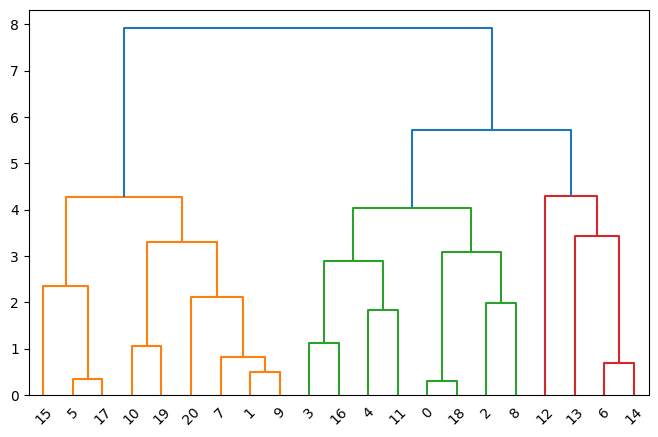

In [5]:
# SciPyライブラリ::cluster.hierarchyによるデンドログラム生成例 - コード引用 https://corvus-window.com/python_hierarchal-clustering/

# クラスタリングの実行（ユークリッド距離、ウォード法）
cluster = linkage(df, method='ward', metric='euclidean')

# 描画領域の定義
plt.figure(num=None, figsize=(8, 5))

# 樹形図の作成・出力
dendrogram(cluster)
plt.show()

# 縦軸を5の位置で切ると3つに分類することができた。それぞれのクラスタ群が何によってグループ化
# されているのか、元のデータに基づいて考察して欲しい（副業ありの場合、高収入な傾向ではある）。

### 1.3 非階層クラスター分析（k-means） [2]

階層的クラスタリングは全データバラバラの状態から、１つずつクラスターを形成していき，最終的に樹形図ができる。しかし全データ間の距離を計算する必要があり、クラスター間の距離の定義によっては毎回距離を更新していく必要があるために、ビッグデータへの適用が困難である。

**非階層的クラスタリング**の代表的な **k-means法** では、樹形図（階層的な構造）を想定せず、予めクラスタ数を与え、適当に定めた初期クラスターから繰り返し計算することで、与えられた距離を最⼩にするようにクラスターを求めるものである[2]。

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=53"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_053.jpg' alt='クラスター分析' width='640' border='1'></a>
</figure>


<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=54"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_054.jpg' alt='クラスター分析' width='640' border='1'></a>
</figure>


#### Pythonによる非階層クラスター分析 k-meansの実装例

非階層クラスター分析の具体的な計算方法について　Scikit-learnライブラリを用いて解説する。

日本の47都道府県の人口千人あたりの新型コロナウイルスの累積感染者数（2021年4月当時）のデータ

* [オリジナルデータとプログラム例（公開教材[1]ただし実装はR）](https://github.com/MDASH-shinshu/MDASH-T-DS/tree/main/4/resources/additional_material/)
* [CSVデータ](https://github.com/MDASH-shinshu/MDASH-T-DS/tree/main/5/resources/)
* [k-means法のpythonによる実装とクラスター数の決定方法 エルボー法、シルエット分析](https://laid-back-scientist.com/k-means)

In [ ]:
# 日本語フォントをpipでインストールする（最初に1度だけでよい）
!pip install japanize-matplotlib
# seabornで日本語ラベルが付けられるようにする
import japanize_matplotlib

In [ ]:
# CSVデータを カレントディレクトリ直下のフォルダ（一時作業領域）へダウンロードする．
!wget -nc https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/5/resources/Tokyo_Covid-19_regression.csv

# wgetしなくても，Google colab.の左メニュー [ファイル] アイコンをクリックして，ブラウザへファイルをドラッグ＆ドロップしても可

# ファイル (udon.csv)がダウンロード・配置できたことを確認する
!ls -al ./

In [8]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA

In [9]:
# オリジナルのCSVファイルをpandasで読み込んでデータフレームdfに格納
df = pd.read_csv('Tokyo_Covid-19_regression.csv', header=1)
df.columns = ['prefecture','positive_rate','population','density','aging_rate','density_central','2hours','4hours','6hours','8hours']
df.head()

,prefecture,positive_rate,population,density,aging_rate,density_central,2hours,4hours,6hours,8hours
0,青森県,0.63,1308,135.6,30.15,331.16,0.59,6.52,25.98,79.54
1,岩手県,0.43,1280,83.8,30.41,328.63,1.53,13.27,34.97,83.01
2,宮城県,1.59,2334,320.5,25.74,1388.68,1.79,15.37,42.90,78.77
3,秋田県,0.26,1023,87.9,33.92,335.55,0.58,5.72,24.01,75.89
4,山形県,0.48,1124,120.5,30.84,650.37,0.77,7.12,26.92,87.49


In [10]:
# 特徴量とする列を指定する（'positive_rate','density','aging_rate','density_central','2hours' の5つ)
df5 = df.iloc[:,[1,3,4,5,6]]

# 特徴量の標準化
sc = StandardScaler()

# 学習データを変換器で標準化
X_std = sc.fit_transform(df5.values)

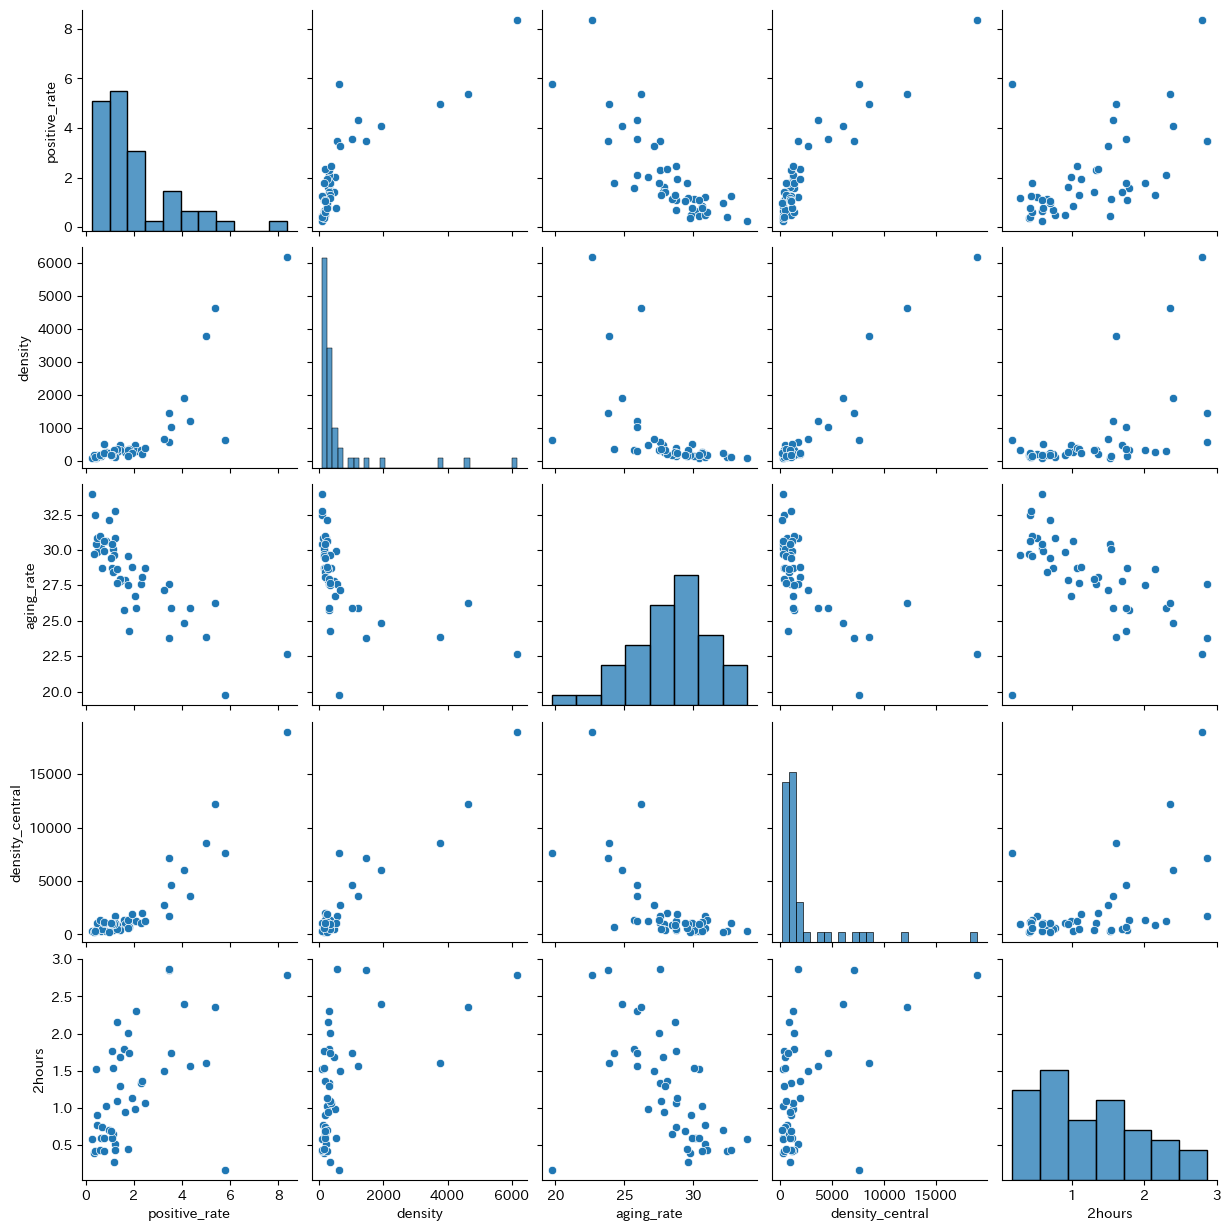

In [11]:
# seaborn.pairplotを使って、取り出した5つの説明変数間でのペアプロットを描画してみる
pg = sns.pairplot(df5)

In [12]:
# 削除後の次元を2に指定し、主成分分析器作成（PCAあるいはKernelPCA gamma: カーネル感度の指定）
decomp = PCA(n_components=2)
#decomp = KernelPCA(n_components=2, kernel='rbf', gamma=0.4, random_state=0)

# 主成分分析の実行（次元削減）
X_decomp = decomp.fit_transform(X_std)

In [13]:
# sklearn.cluster.KMeansを使用してクラスタリング実行
# initを省略すると、k-means++法が適応される(randomではk-means法が適応) 

# n_clustersによってクラスタ分割数を指定
model = KMeans(n_clusters=3, random_state=0, init='random')  
model.fit(X_decomp)

clusters = model.predict(X_decomp)  # データが属するクラスターのラベルを取得
print(clusters)

# model.cluster_centers_ でクラスター重心の座標を取得できる
df_cluster_centers = pd.DataFrame(model.cluster_centers_)
df_cluster_centers.columns = ['x1', 'x2']
print(df_cluster_centers)

[1 1 0 1 1 1 1 0 1 0 0 2 2 1 1 1 1 1 1 1 1 0 1 0 0 2 0 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 0]
         x1        x2
0  1.237425  0.842513
1 -1.013455 -0.204954
2  5.522671 -1.252195


In [14]:
# seabornのプロット点にラベル付けするための関数
def label_point(x,y,id,ax):
  df_tmp=pd.concat({'x':x,'y':y,'id':id}, axis='columns')
  for i, point in df_tmp.iterrows():
    ax.text(point['x'], point['y'], point['id'],\
    fontsize=10\
    )

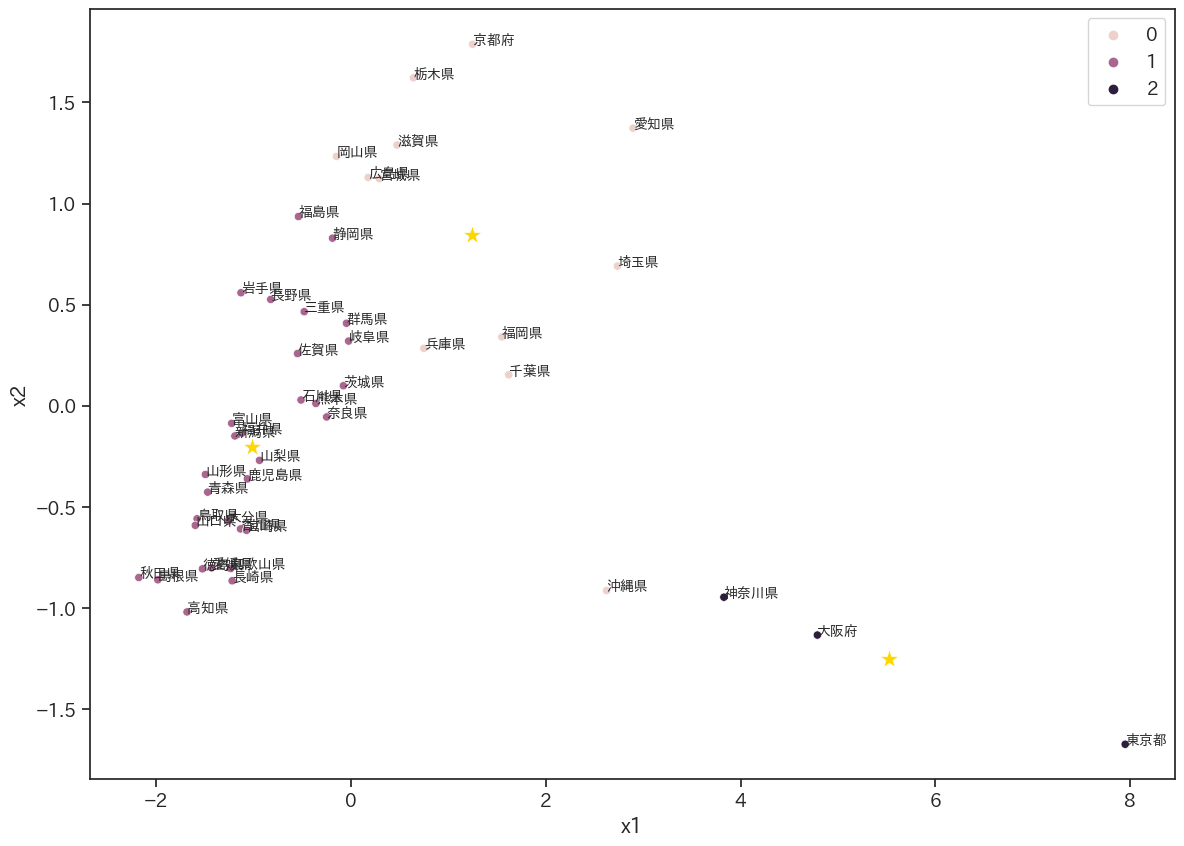

In [15]:
# seabornで日本語ラベルが付けられるようにする
import japanize_matplotlib

# 主成分分析後、クラスタ分類後のデータを結合する
df_decomp = pd.DataFrame(X_decomp, columns=['x1', 'x2'])
df_decomp['class'] = clusters

# 図、フォントのサイズを設定
plt.figure(figsize=(14, 10))
sns.set(style="ticks", font_scale=1.2, palette='bright', color_codes=True, font="IPAexGothic")

# クラスタリングデータをプロット
ax = sns.scatterplot(data=df_decomp, x='x1', y='x2', hue='class')
# ラベル付け
label_point(df_decomp.iloc[:,0], df_decomp.iloc[:,1], df.iloc[:,0], ax)

# クラスター重心をプロット
sns.scatterplot(data=df_cluster_centers, x='x1', y='x2', s=200, marker='*', color='gold', linewidth=0.5)

# クラスタリング結果を総合的に可視化する
plt.show()

## 2. 次元削減[1][2]

### 2.1 PCA(Principle Component Analysis) 主成分分析

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=66"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_066.jpg' alt='次元削減' width='640' border='1'></a>
</figure>


<figure>
<img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/5/figures/DS3_09.png' alt='次元削減' width='1024' border='1'>
<figcaption>次元削減、主成分分析(PCA) （ASPINA_DS講座スライドより引用）</figcaption>
</figure>

### 2.2 特徴選択、特徴抽出、寄与率

<figure>
<img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/5/figures/DS3_20.png' alt='次元削減' width='1024' border='1'>
<figcaption>特徴選択、特徴抽出 （ASPINA_DS講座スライドより引用）</figcaption>
</figure>

<figure>
<img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/5/figures/DS3_21.png' alt='次元削減' width='1024' border='1'>
<figcaption>主成分分析、寄与率 （ASPINA_DS講座スライドより引用）</figcaption>
</figure>

### 2.3 主成分分析(PCA)の計算ステップ、分散最大化

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=71"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_071.jpg' alt='次元削減' width='640' border='1'></a>
</figure>


<figure>
<img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/5/figures/DS3_22.png' alt='次元削減' width='1024' border='1'>
<figcaption>主成分分析(PCA)の計算ステップ、分散最大化 （ASPINA_DS講座スライドより引用）</figcaption>
</figure>

### 2.4 カーネルPCA、多様体埋め込み

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=85"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_085.jpg' alt='次元削減' width='640' border='1'></a>
</figure>


<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=86"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_086.jpg' alt='次元削減' width='640' border='1'></a>
</figure>


<figure>
<img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/5/figures/DS3_23.png' alt='次元削減' width='1024' border='1'>
<figcaption>カーネルトリック、KernelPCA、多様体埋め込み （ASPINA_DS講座スライドより引用）</figcaption>
</figure>

#### PythonによるKernelPCAの実装例

KernelPCAの具体的な計算方法について　Scikit-learnライブラリを用いて解説する。

* [sklearn.decomposition.KernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)
* [Qiita - Kernel PCA](https://qiita.com/shuva/items/9625bc326e2998f1fa27)
* [KernelPCAでカーネル主成分分析をする](https://tech.nkhn37.net/scikit-learn-kernelpca/)

#### 実装例（circlesデータ） 

scikit-learnのデータに用意されているmake_circlesを使って生成したデータで、線形分離不可能なデータを線形分離できるように変換してみる。


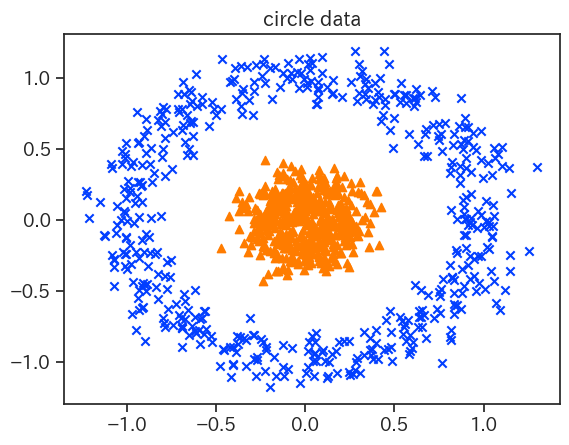

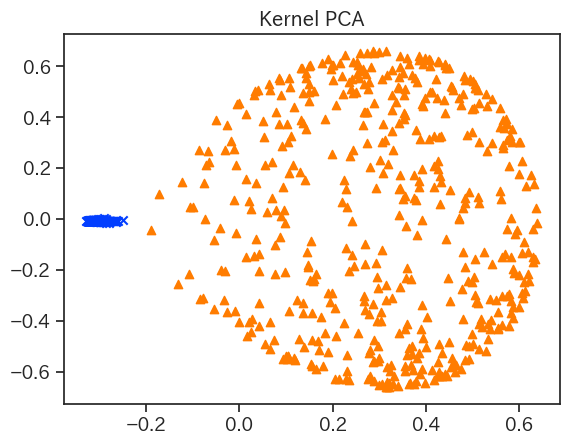

In [16]:
# 実装例（circlesデータ） - コード引用 https://tech.nkhn37.net/scikit-learn-kernelpca/

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

np.random.seed(0)

# データの用意・表示 (内側の円と外側の円で分かれているデータ)
data, label = make_circles(n_samples=1000, noise=0.1, factor=0.2)
plt.scatter(data[label == 0, 0], data[label == 0, 1], marker="x")
plt.scatter(data[label == 1, 0], data[label == 1, 1], marker="^")
plt.title("circle data")

# カーネルPCAのモデル生成・学習

# KernelPCAのハイパーパラメータ: 
## n_components：主成分の数を指定
## kernel：カーネル関数を指定します。今回は'rbf'（動径基底関数）を指定。
## gamma：rbfのパラメータを指定
k_pca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
k_pca.fit(data, label)

# 主成分軸への変換
trans_data = k_pca.transform(data)

# 変換結果を表示
plt.figure()
plt.scatter(trans_data[label == 0, 0], trans_data[label == 0, 1], marker="x")
plt.scatter(trans_data[label == 1, 0], trans_data[label == 1, 1], marker="^")
plt.title("Kernel PCA")
plt.show()


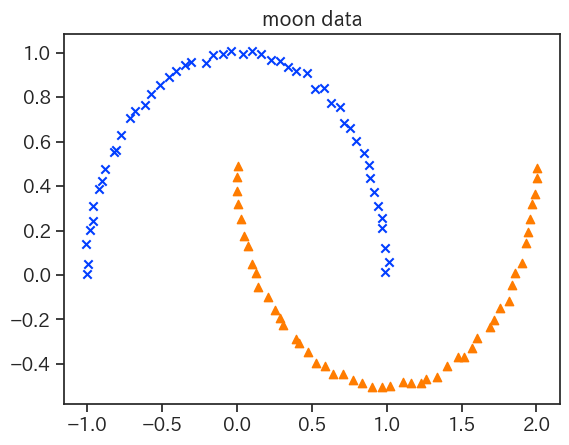

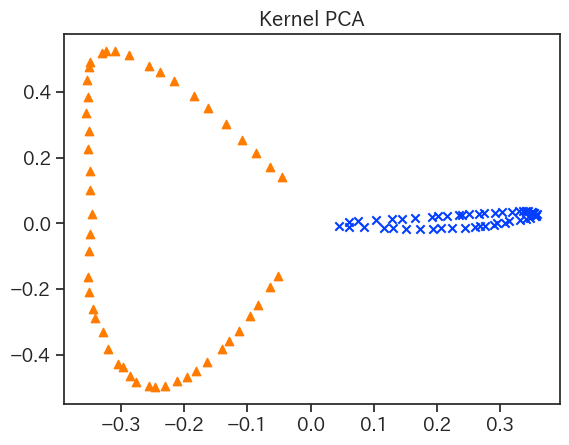

In [17]:
# 実装例（moonsデータ） - コード引用 https://tech.nkhn37.net/scikit-learn-kernelpca/

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA

np.random.seed(0)

# データの用意・表示 (２つのムーン)
data, label = make_moons(n_samples=100, noise=0.01)
plt.scatter(data[label == 0, 0], data[label == 0, 1], marker="x")
plt.scatter(data[label == 1, 0], data[label == 1, 1], marker="^")
plt.title("moon data")

# カーネルPCAのモデル生成・学習
k_pca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
k_pca.fit(data, label)

# 主成分軸への変換
trans_data = k_pca.transform(data)

# 変換結果を表示
plt.figure()
plt.scatter(trans_data[label == 0, 0], trans_data[label == 0, 1], marker="x")
plt.scatter(trans_data[label == 1, 0], trans_data[label == 1, 1], marker="^")
plt.title("Kernel PCA")
plt.show()


※前節のクラスタ分析のPythonコードでは、通常のPCAとともに、KernelPCAがそのまま適用できるようにコメントアウトされている。ここまで学習したからには、カーネルトリックによる分離能力について実際に評価してみると良い（カーネル感度 gammaのハイパーパラメータは要調整）。

`decomp = KernelPCA(n_components=2, kernel='rbf', gamma=0.4, random_state=0)`

<figure>
<img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/5/figures/KPCA_result.png' alt='次元削減' width='700' border='1'>
<figcaption>sec.1.3 の次元削減手法を KernelPCAによって実行した後、k-meansクラスタリングした結果</figcaption>
</figure>

## 3. パターン発見（アソシエーション分析） [1][2]

販売・取引に関するデータから、意思決定に役に⽴つ規則や注⽬すべきパターンを発⾒する⽅法として、アソシエーション分析がある。

⽀持度，確信度，リフト値などの概念と相関ルール抽出や頻出パターン発⾒の⽅法としてのAprioriアルゴリズムを紹介する.

### 3.1 アソシエーション分析の概要 [1][2]

消費者の興味ある購買行動パターンを**アソシエーションルール**(association rule)といい、
アソシェーションルールを見つけ出し、顧客の将来の行動を予測するための分析を**アソシエーション分析**(associ ation analysis) と呼ぶ。

特に，商品の同時購買のパターンを発見するための分析は、**マーケットバスケット分析**(market basket
analysis) とも呼ばれる[2]。


<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=57"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_057.jpg' alt='アソシエーション分析' width='640' border='1'></a>
</figure>


<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=58"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_058.jpg' alt='アソシエーション分析' width='640' border='1'></a>
</figure>


<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=59"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_059.jpg' alt='アソシエーション分析' width='640' border='1'></a>
</figure>


### 3.2 支持度、確信度、リフト値[1][2]

**支持度**（support）：すべての購買履歴のうちで、商品Aと商品B を同時に購買しているものの割合。つまり、
$$ 支持度 = \frac{商品A,Bの同時購買履歴数}{全購買履歴数} $$

**確信度**(confidence)：商品Aの購買履歴のうちで、商品B も同時に購買しているものの割合。つまり、
$$ 確信度 = \frac{商品A,Bの同時購買履歴数}{商品Aの購買履歴数} $$

**リフト値**(lift)：確信度と商品Bの購買率の比。つまり、
$$ リフト値 = \frac{確信度}{商品Bの購買履歴数/全購買履歴数} $$

例えば リフト値が1より大きいときは、「商品Aを買う人は、商品Aを買わない人よりも相対的に商品Bを買う傾向にある」といえる。

例）イタリアンの料理店で、チーズとパスタを注文した客は、高い確率でワインも注文するであろう[*]。

* [DXCEL WAVE | アソシエーション・バスケット分析実践法](https://di-acc2.com/marketing/16651/)


<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=60"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_060.jpg' alt='アソシエーション分析' width='640' border='1'></a>
</figure>


### 3.2 Aprioriアルゴリズム

Aprioriとは、アソシエーション分析を実践するためのアルゴリズムのことである。
アソシエーション分析において⾼速に相関ルールや頻出アイテム集合を検出するために
1990年代前半にIBM研究所で開発されたアルゴリズムで、その後開発されたアルゴリズムの基礎ともなっている[1]。

Aprioriは「頻出アイテム（商品・サービス）の組み合わせを検出し、アソシエーションルールを決定するための評価指標（Support、Confidence、Liftなど）を算出する機能」を有した最も有名なアソシエーション分析アルゴリズムの1つである[*]。

* [DXCEL WAVE | アソシエーション・バスケット分析実践法](https://di-acc2.com/marketing/16651/)


<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/1-4_data_analysis.pdf#page=62"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/4/UTAI-text/JPEG/1-4_data_analysis_062.jpg' alt='アソシエーション分析' width='640' border='1'></a>
</figure>


#### Python mlxtendライブラリによる Aprioriアルゴリズム/アソシエーション分析の実装例

Aprioriアルゴリズム/アソシエーション分析の具体的な計算方法についてPython mlxtendライブラリを用いて解説する。
データは、KaggleのApriori Association Grocery Storeから、あるスーパーマーケットにおける購買データ (max32商品、n=9835)である（すべて質的変数であることに注意）。

* [Kaggle | Apriori Association Grocery Store](https://www.kaggle.com/code/ekrembayar/apriori-association-rules-grocery-store/data?select=Grocery+Products+Purchase.csv)
* [Kaggle | Grocery Products Purchase Data (CSV)](https://www.kaggle.com/datasets/alexmiles/grocery-products-purchase-data?resource=download)
* [Mlxtend (machine learning extensions)](https://rasbt.github.io/mlxtend/)

目的：スーパーマーケットで売られている商品の組み合わせに対してアソシエーション分析を適用し、強い関係性を示す（高頻度で一緒に購入される）商品の組み合わせをアソシエーション・ルールとして抽出する。


* [コード引用 DXCEL WAVE | アソシエーション・バスケット分析実践法](https://di-acc2.com/marketing/16651/)


In [ ]:
# mlxtendパッケージをインストール（最初の１回だけ）
!pip install mlxtend

In [ ]:
# CSVデータを カレントディレクトリ直下のフォルダ（一時作業領域）へダウンロードする．
!wget -nc https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DS/main/5/resources/Grocery_Products_Purchase.csv

# wgetしなくても，Google colab.の左メニュー [ファイル] アイコンをクリックして，ブラウザへファイルをドラッグ＆ドロップしても可

# ファイル (udon.csv)がダウンロード・配置できたことを確認する
!ls -al ./

In [20]:
# 全ての警告メッセージを非表示（オプション）
import warnings
warnings.simplefilter('ignore')

In [21]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


In [22]:
# オリジナルのCSVファイルをpandasで読み込んでデータフレームdfに格納
data = pd.read_csv('Grocery_Products_Purchase.csv', header=1)
data.columns = ['Product1','Product2','Product3','Product4','Product5','Product6','Product7','Product8','Product9','Product10','Product11','Product12','Product13','Product14','Product15','Product16','Product17','Product18','Product19','Product20','Product21','Product22','Product23','Product24','Product25','Product26','Product27','Product28','Product29','Product30','Product31','Product32']
data.head()

,Product1,Product2,Product3,Product4,Product5,Product6,Product7,Product8,Product9,Product10,...,Product23,Product24,Product25,Product26,Product27,Product28,Product29,Product30,Product31,Product32
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### データ前処理

In [23]:
# データ加工｜トランザクション形式データセットに変換（可変長のリスト形式）

# レコード数
record_len = len(data)
# カラム数
column_len = len(data.columns)

# トランザクション形式に加工
transactions = []
for i in range(record_len):
    # データをリスト型に変更
    values = [str(data.values[i,j]) for j in range(column_len)]
    values_notnull = []
    for check in values:
        if check != 'nan':
            values_notnull.append(check)
    transactions.append(values_notnull)

# 変換結果の表示
print(transactions)

[['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product'], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'], ['rolls/buns'], ['other vegetables', 'UHT-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)'], ['potted plants'], ['whole milk', 'cereals'], ['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate'], ['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes'], ['beef'], ['frankfurter', 'rolls/buns', 'soda'], ['chicken', 'tropical fruit'], ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'], ['fruit/vegetable juice'], ['packaged fruit/vegetables'], ['chocolate'], ['specialty bar'], ['other vegetables'], ['butter milk', 'pastry'], ['whole milk'], ['tropical fruit', 'cream cheese', 'processed cheese', 'detergent', 'newspapers'], ['tropical fr

In [24]:
# データ加工｜テーブル形式データセットに変換（各商品別に顧客の購買の有無をTrue/Falseで表現）
from mlxtend.preprocessing import TransactionEncoder

# データをテーブル形式に加工
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


#### Aprioriアルゴリズムの実行

In [25]:
# 商品の組み合わせ別に支持度（Support）を算出する

from mlxtend.frequent_patterns import apriori

freq_items = apriori(df,                     # データフレーム
                     min_support  = 0.01,    # 結果として生成されるデータのSupport最小値
                     use_colnames = True,    # 出力値のカラムに購入商品名を表示
                     max_len      = None,    # 生成されるitemsetsの個数
                    )

# 結果出力（支持度(>=min_support)が高い順に商品名が出てくる）
freq_items = freq_items.sort_values("support", ascending = False).reset_index(drop=True)
print(freq_items)

      support                    itemsets
0    0.255542                (whole milk)
1    0.193512          (other vegetables)
2    0.183954                (rolls/buns)
3    0.174395                      (soda)
4    0.139516                    (yogurt)
..        ...                         ...
328  0.010067      (sausage, frankfurter)
329  0.010067  (curd, whole milk, yogurt)
330  0.010067          (rolls/buns, curd)
331  0.010067   (tropical fruit, napkins)
332  0.010067   (hard cheese, whole milk)

[333 rows x 2 columns]


In [26]:
# モデル作成｜アソシエーション・ルール決定に用いる評価値算出
from mlxtend.frequent_patterns import association_rules

# アソシエーション・ルール抽出
df_rules = association_rules(freq_items,             # supportとitemsetsを持つデータフレーム
                             metric = "confidence",  # アソシエーション・ルールの評価指標
                             min_threshold = 0.1,    # metricsの閾値
                            )

# 支持度の高い組み合わせ別に、評価値が出力される 信頼度(confidence) リフト値(lift)でソートしてみよ
df_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193512,0.255542,0.074842,0.386758,1.513480,0.025392,1.213971
1,(whole milk),(other vegetables),0.255542,0.193512,0.074842,0.292877,1.513480,0.025392,1.140520
2,(rolls/buns),(whole milk),0.183954,0.255542,0.056640,0.307905,1.204909,0.009632,1.075659
3,(whole milk),(rolls/buns),0.255542,0.183954,0.056640,0.221647,1.204909,0.009632,1.048428
4,(whole milk),(yogurt),0.255542,0.139516,0.056030,0.219260,1.571575,0.020378,1.102139
...,...,...,...,...,...,...,...,...,...
455,"(whole milk, yogurt)",(curd),0.056030,0.053285,0.010067,0.179673,3.371961,0.007082,1.154071
456,(curd),"(whole milk, yogurt)",0.053285,0.056030,0.010067,0.188931,3.371961,0.007082,1.163859
457,(curd),(rolls/buns),0.053285,0.183954,0.010067,0.188931,1.027059,0.000265,1.006137
458,(napkins),(tropical fruit),0.052369,0.104942,0.010067,0.192233,1.831802,0.004571,1.108065


In [27]:
# 分析モデルより得られた結果（df_rules）からデータ抽出し、最終的なアソシエーション・ルールを決定していく
# 抽出条件として今回は 信頼度>0.2 かつ リフト値>3.0 を設定する

results = df_rules[(df_rules['confidence'] > 0.2) &  # 信頼度
          (df_rules['lift'] > 3.0)]                  # リフト値

# 結果出力
results.loc[:,["antecedents","consequents","confidence","lift"]]

,antecedents,consequents,confidence,lift
162,(beef),(root vegetables),0.331395,3.040058
300,"(tropical fruit, other vegetables)",(root vegetables),0.342776,3.144460
301,"(tropical fruit, root vegetables)",(other vegetables),0.584541,3.020692
415,"(other vegetables, citrus fruit)",(root vegetables),0.359155,3.294710
416,"(root vegetables, citrus fruit)",(other vegetables),0.586207,3.029300
445,"(other vegetables, yogurt)",(whipped/sour cream),0.234192,3.266730


#### レコメンド戦略に向けた考察

上記の結果において、例えば163行目を見ると、「beef」を購入する顧客は「root vegatables(根菜)」を普通より3倍高い確率で購入している（リフト値=3.040058）ことが分かります。

ステーキとかローストビーフを作る際には、ジャガイモとか人参、にんにくやセロリを一緒に買って調理に使ったり付け合せにしたりしますよね。

レコメンド機能実装やクロスセルを促す際は「もし顧客がbeefを購入する場合、root vegetablesをいくつかレコメンドする」というアソシエーション・ルールが適用できそうです。

もちろんローストビーフであれば赤ワインが欠かせない訳で、更に確信度とリフト値を探ってエビデンスが得られれば、店舗のお肉売り場の近くにローストビーフのレシピやポップ、同時に赤ワインを薦めるようなポップがあったり、ワイン売り場への案内があったりすると効果的と言えそうです（ここから先はデータサイエンスではなく、経済学・マーケティングの領域となる）。



# memo